In [11]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.stats import sem
from matplotlib import ticker
import scipy.io as io
from scipy.stats import ttest_rel
from RZutilpy.figure import plot, bar, colorpalettable, default_img_set
default_img_set()

In [12]:
with open('../Results/Metrics_All_Pre_Post.pkl', 'rb') as f:
    Metrics = pickle.load(f)
with open('../Results/Decoding_supp.pkl', 'rb') as f:
    Decoding = pickle.load(f)

In [13]:
Decoding_Pre = Metrics["Decoding_tp1"].mean(axis=(1,5))
Decoding_Post = Metrics["Decoding_tp2"].mean(axis=(1,5))
LFI_Pre = Metrics["LFI_tp1"].mean(axis=(1,5))
LFI_Post = Metrics["LFI_tp2"].mean(axis=(1,5))
decoding_acc_mean = np.vstack((Decoding_Pre.mean(axis=(0, 2, 3)),Decoding_Post.mean(axis=(0, 2, 3)))).T
decoding_acc_se = np.vstack((sem(Decoding_Pre.mean(axis=(2,3)),axis=0),sem(Decoding_Post.mean(axis=(2,3)),axis=0))).T
LFI_mean = np.vstack((LFI_Pre.mean(axis=(0, 2, 3)),LFI_Post.mean(axis=(0, 2, 3)))).T
LFI_se = np.vstack((sem(LFI_Pre.mean(axis=(2,3)),axis=0),sem(LFI_Post.mean(axis=(2,3)),axis=0))).T

In [14]:
ryzcolor = colorpalettable('ryz1')
C0, C0_alpha=np.array(ryzcolor(0)),np.array(ryzcolor(0))
C1, C1_alpha=np.array(ryzcolor(1)),np.array(ryzcolor(1))
C0_alpha[-1]=0.3
C1_alpha[-1]=0.3

In [15]:
print(ttest_rel(Decoding_Pre.mean(axis=(2,3)), Decoding_Post.mean(axis=(2,3)), axis=0, alternative='less'))
print(ttest_rel(np.log(LFI_Pre).mean(axis=(2,3)), np.log(LFI_Post).mean(axis=(2,3)), axis=0,alternative='less'))

TtestResult(statistic=array([ 7.91625945, -1.793642  , -3.59533038, -6.02599489, -5.62158426]), pvalue=array([0.99789875, 0.0853821 , 0.01844187, 0.00458027, 0.00556517]), df=array([3, 3, 3, 3, 3]))
TtestResult(statistic=array([ 3.93398591, -1.84614491, -3.46916291, -5.64120133, -4.73033796]), pvalue=array([0.98537367, 0.08102219, 0.02018543, 0.00551131, 0.00895281]), df=array([3, 3, 3, 3, 3]))


2
2


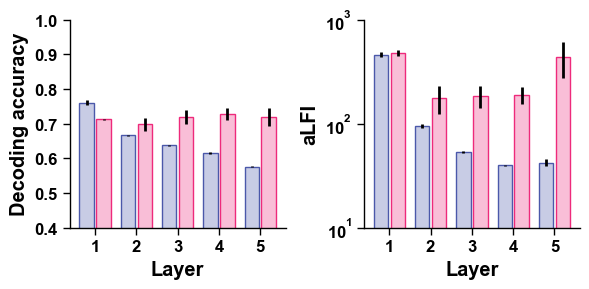

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
plt.sca(ax[0])
bar(np.arange(5), decoding_acc_mean, yerr=decoding_acc_se, width=0.35, bargap=0.06, ecolor='k',color=[C0_alpha, C1_alpha], edgecolor=[C0, C1])
ax[0].set_ylim([0.4,1])
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_xlabel("Layer")
ax[0].set_xticklabels(["1","2","3","4","5"])
ax[0].set_ylabel("Decoding accuracy")

plt.sca(ax[1])
bar(np.arange(5), LFI_mean, yerr=LFI_se, ecolor='k',width=0.35,bargap=0.06, color=[C0_alpha, C1_alpha], edgecolor=[C0, C1])
ax[1].set_xlabel("Layer")
ax[1].set_ylabel("aLFI")
ax[1].set_xticks([0,1,2,3,4])
ax[1].set_xticklabels(["1","2","3","4","5"])
ax[1].set_yscale('log')
ax[1].set_yticks([1e1, 1e2,1e3])
ax[1].minorticks_off()
# plt.savefig('Fig2_2.pdf')